In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import sys
import glob
import argparse
from keras import __version__
from keras.applications.xception import preprocess_input as xception_preprocess_input
from keras.layers import *
from keras.activations import *
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras import optimizers
from keras import callbacks
import skimage.io as io
import skimage.transform as trans
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.regularizers import l2,l1
import pandas as pd

input_shape = (224,224,3)
nbr_of_classes=38

In [ ]:
#Encoder Start
base_model1 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
dense1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x = classif_out_encoder1 = Dense(38, name='out1', activation = 'softmax')(dense1) # Latent Representation / Bottleneck

#Get Xception's tensors for skip connection.
conv14 = base_model1.get_layer('block14_sepconv2_act').output
conv13 = base_model1.get_layer('block13_sepconv2_bn').output
conv12 = base_model1.get_layer('block12_sepconv3_bn').output
conv11 = base_model1.get_layer('block11_sepconv3_bn').output
conv10 = base_model1.get_layer('block10_sepconv3_bn').output
conv9 = base_model1.get_layer('block9_sepconv3_bn').output
conv8 = base_model1.get_layer('block8_sepconv3_bn').output
conv7 = base_model1.get_layer('block7_sepconv3_bn').output
conv6 = base_model1.get_layer('block6_sepconv3_bn').output
conv5 = base_model1.get_layer('block5_sepconv3_bn').output
conv4 = base_model1.get_layer('block4_sepconv2_bn').output
conv3 = base_model1.get_layer('block3_sepconv2_bn').output
conv2 = base_model1.get_layer('block2_sepconv2_bn').output
conv1 = base_model1.get_layer('block1_conv2_act').output

#Decoder Start
dense2 = Dense(256, activation='relu')(x)

x = Add(name='first_merge')([dense1, dense2])
x = Dense(7*7*2048)(x)
reshape1 = Reshape((7, 7, 2048))(x)

#BLOCK 1
x = SeparableConv2D(2048, (3,3), padding='same', name='block14_start')(reshape1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv14, x], axis = 3)
x = SeparableConv2D(1536, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = c14 = Activation('relu')(x)

#BLOCK 2
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3,3), padding='same', name='block13_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv13, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c1314 = Conv2D(728, (1,1))(UpSampling2D()(c14))
x = add1 = Add()([c1314, x])

#BLOCK 3
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='blockmiddle_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv12, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add2 = Add()([add1, x])
#BLOCK 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv11, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add3 = Add()([add2, x])
#BLOCK 5
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv10, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add4 = Add()([add3, x])
#BLOCK 6
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv9, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add5 = Add()([add4, x])
#BLOCK 7
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv8, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add6 = Add()([add5, x])
#BLOCK 8
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv7, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add7 = Add()([add6, x])
#BLOCK 9
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv6, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add8 = Add()([add7, x])
#BLOCK 10
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv5, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name ='blockmiddle_end')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add9 = Add()([add8, x])

#BLOCK 11
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='block4_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv4, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c45 = Conv2D(728, (1,1))(UpSampling2D()(add9))
x = add10 = Add()([c45, x])

#BLOCK 12
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='valid', name='block3_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv3, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c34 = Conv2D(256, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add10))
x = add11 = Add()([c34, x])

#BLOCK 13
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='valid', name='block2_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv2, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c23 = Conv2D(128, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add11))
x = add12 = Add()([c23, x])

#BLOCK 14
x = Conv2D(64, (3,3), padding='same', name='block1_start')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv1, x], axis = 3)
x = ZeroPadding2D()(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D()(x)
x = ZeroPadding2D()(x)

x = Conv2D(2, 3, activation = 'relu', padding = 'same',)(x)
mask = x = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(x)

base_model2 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Create ResTS Model
model = Model(base_model1.input, [classif_out_encoder1, classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights, metrics = ['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [43]:
import datetime
from keras import backend as K
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

def preprocess_image(image_path,image_size = (224,224)):
    original_image = image.load_img(image_path , target_size=image_size)
    img = image.img_to_array(original_image)
    img = np.expand_dims(img, axis=0)
    img = xception_preprocess_input(img)
    return original_image,img

def build_visualization(model_weights_path):
    model.load_weights(model_weights_path)
    layer_name ='Mask'
    NewInput = model.get_layer(layer_name).output
    visualization = K.function([model.input], [NewInput])
    return visualization,model

def reduce_channels_sequare(heatmap):
    channel1 = heatmap[:,:,0]
    channel2 = heatmap[:,:,1]
    channel3 = heatmap[:,:,2]
    new_heatmap = np.sqrt(((channel1-0.149)*(channel1-0.149))+((channel2-0.1529)*(channel2-0.1529))+((channel3-0.3412)*(channel3-0.3412)))
    return new_heatmap
	
def postprocess_vis(heatmap1,threshould = 0.9):
    heatmap=heatmap1.copy()
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap = reduce_channels_sequare(heatmap)
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap[heatmap>threshould] = 1
    heatmap = heatmap*255
    return heatmap

def visualize_image(visualization,image_path,out_folder):
    base=os.path.basename(image_path)
    image_name= os.path.splitext(base)[0]
    original_image,img = preprocess_image(image_path)
    vis = visualization([img])[0][0]
    
    '''
    c1 =vis[:,:,0]
    c2 =vis[:,:,1]
    c3 =vis[:,:,2]

    vis[:,:,0] = c3
    vis[:,:,1] = c2
    vis[:,:,2] = c1
    '''
    
    heatmap = postprocess_vis(vis)
    
    f, axarr = plt.subplots(1,3, figsize=(7, 25))
    axarr[0].imshow(original_image)
    axarr[0].set_title('Original image')
    axarr[0].axis('off')
    axarr[1].imshow(vis)
    axarr[1].set_title('Reconstructed image')
    axarr[1].axis('off')
    axarr[2].imshow(heatmap,cmap='Reds')
    axarr[2].set_title('Heatmap')
    axarr[2].axis('off')
    
    plt.show()
    
    
def visualize_folder(visualization,images_folder,out_folder):	
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    for path in os.listdir(images_folder):
		    print(path)
		    image_path = os.path.join(images_folder,path)
		    visualize_image(visualization,image_path,out_folder)

In [44]:
visualization,model = build_visualization('/model/ResTS.h5')

1c2b4d6c-dc3d-4913-b98f-2da54c4f6614___FAM_B.Rot 3602_final_masked.jpg


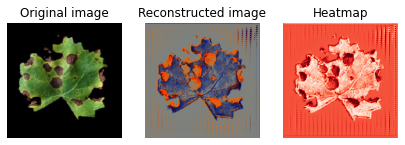

b954c296-ae18-4efb-8a8c-450486faa919___RS_Early.B 6998_final_masked.jpg


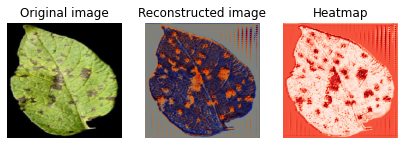

caa6bf76-9ff3-4bc1-b9d8-c9ea29a48167___RS_L.Scorch 1321_final_masked.jpg


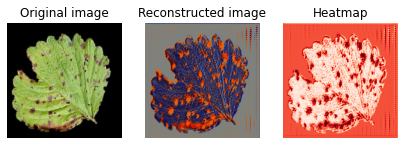

bcfc0867-45d3-44f9-9026-e3e8eec25807___Matt.S_CG 2635_final_masked.jpg


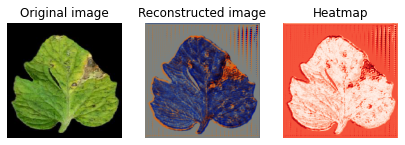

2423106f-b2fd-45ed-ac52-69c093b39826___Matt.S_CG 2737_final_masked.jpg


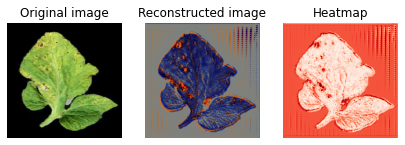

In [45]:
images_folder = '/visualizations'
out_folder = '/images'
visualize_folder(visualization,images_folder,out_folder)